In [1]:
%load_ext autoreload
%autoreload 1
%aimport pygenesig.file_formats
%aimport pygenesig.visualization

from pygenesig.file_formats import *
from pygenesig.bioqc import BioQCSignatureTester
from pygenesig.tools import translate_signatures
from pygenesig.visualization import * 

from pylab import * 
%matplotlib inline

# Run GTEx v6 signatures on FANTOM5 samples. 

In [2]:
gtex_sig = load_gmt("../results/gtex_v6_gini_0.8_3/signatures.gmt")

### Fantom5 data

In [3]:
f5_expr = read_expr("../data_processed/fantom5/exprs.npy")
f5_rosetta_inv = read_rosetta("../data_processed/fantom5/rosetta.csv", inverse=True)
f5_target = read_target("../data_processed/fantom5/target.csv")

In [4]:
f5_expr.shape, f5_target.shape

((19159, 174), (174,))

In [5]:
f5_target_map = pd.read_csv("../manual_annotation/fantom5_map_tissues.csv", sep=";", header=None)
target_dict = dict(zip(f5_target_map[0], f5_target_map[1]))
f5_target_new = pd.Series([target_dict[t] for t in f5_target])

In [6]:
f5_expr_new = f5_expr[:, ~f5_target_new.isnull().values]
f5_target_new = f5_target_new[~f5_target_new.isnull()].values

In [7]:
f5_expr_new.shape, f5_target_new.shape

((19159, 118), (118,))

### Translate signatures to index of gene expression matrix
We need to transform the gene symbols in the gtex-signatures to
the indices of the gene expression matrix of mouseGNF

In [8]:
gtex_sig_ind = translate_signatures(gtex_sig, f5_rosetta_inv, ignore_missing=True)

## run BioQC

In [9]:
st = BioQCSignatureTester(f5_expr_new, f5_target_new)

In [10]:
scores = st.score_signatures(gtex_sig_ind)

In [11]:
score_mat = aggregate_scores(st.sort_signatures(gtex_sig_ind), scores, f5_target_new)

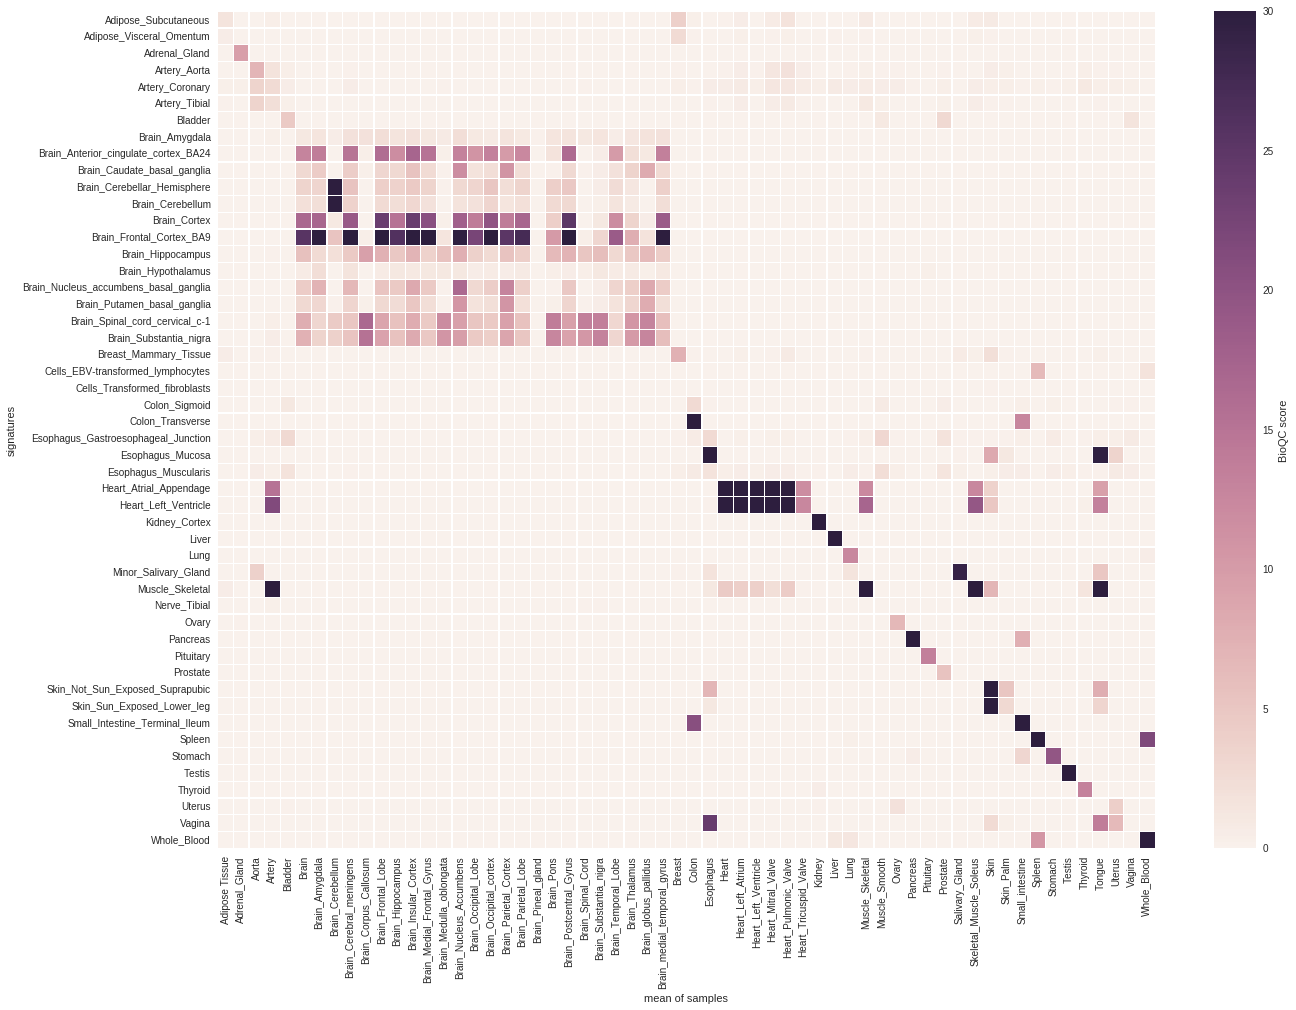

In [12]:
fig, ax = plot_score_heatmap(score_mat)

In [13]:
fig.savefig("../results/figures/gtex_fantom5_scores.pdf", bbox_inches='tight')

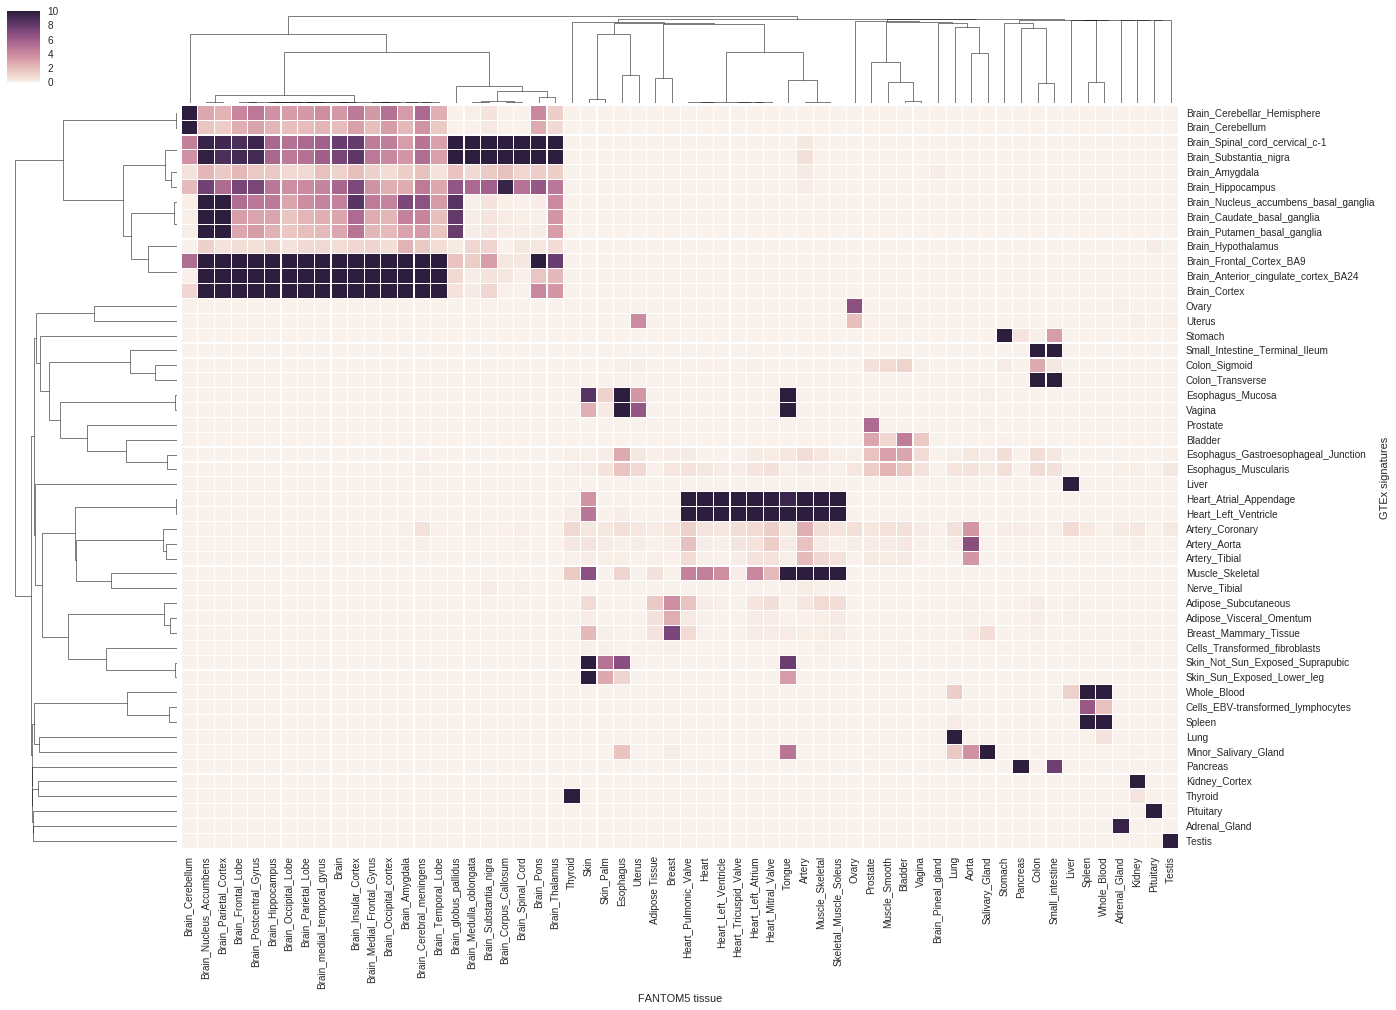

In [14]:
g = sns.clustermap(score_mat, method='average', metric='correlation', linewidths=.2, figsize=heatmap_figsize(score_mat.shape[0], score_mat.shape[1]), vmax=10)
ax = g.ax_heatmap
plt.setp(ax.get_yticklabels(), rotation=0);
ax.set_ylabel("GTEx signatures")
ax.set_xlabel("FANTOM5 tissue")

In [15]:
!mkdir -p ../results/figures

In [16]:
g.savefig("../results/figures/gtex_fantom5_cluster.pdf", bbox_inches='tight')

In [17]:
se

NameError: name 'se' is not defined